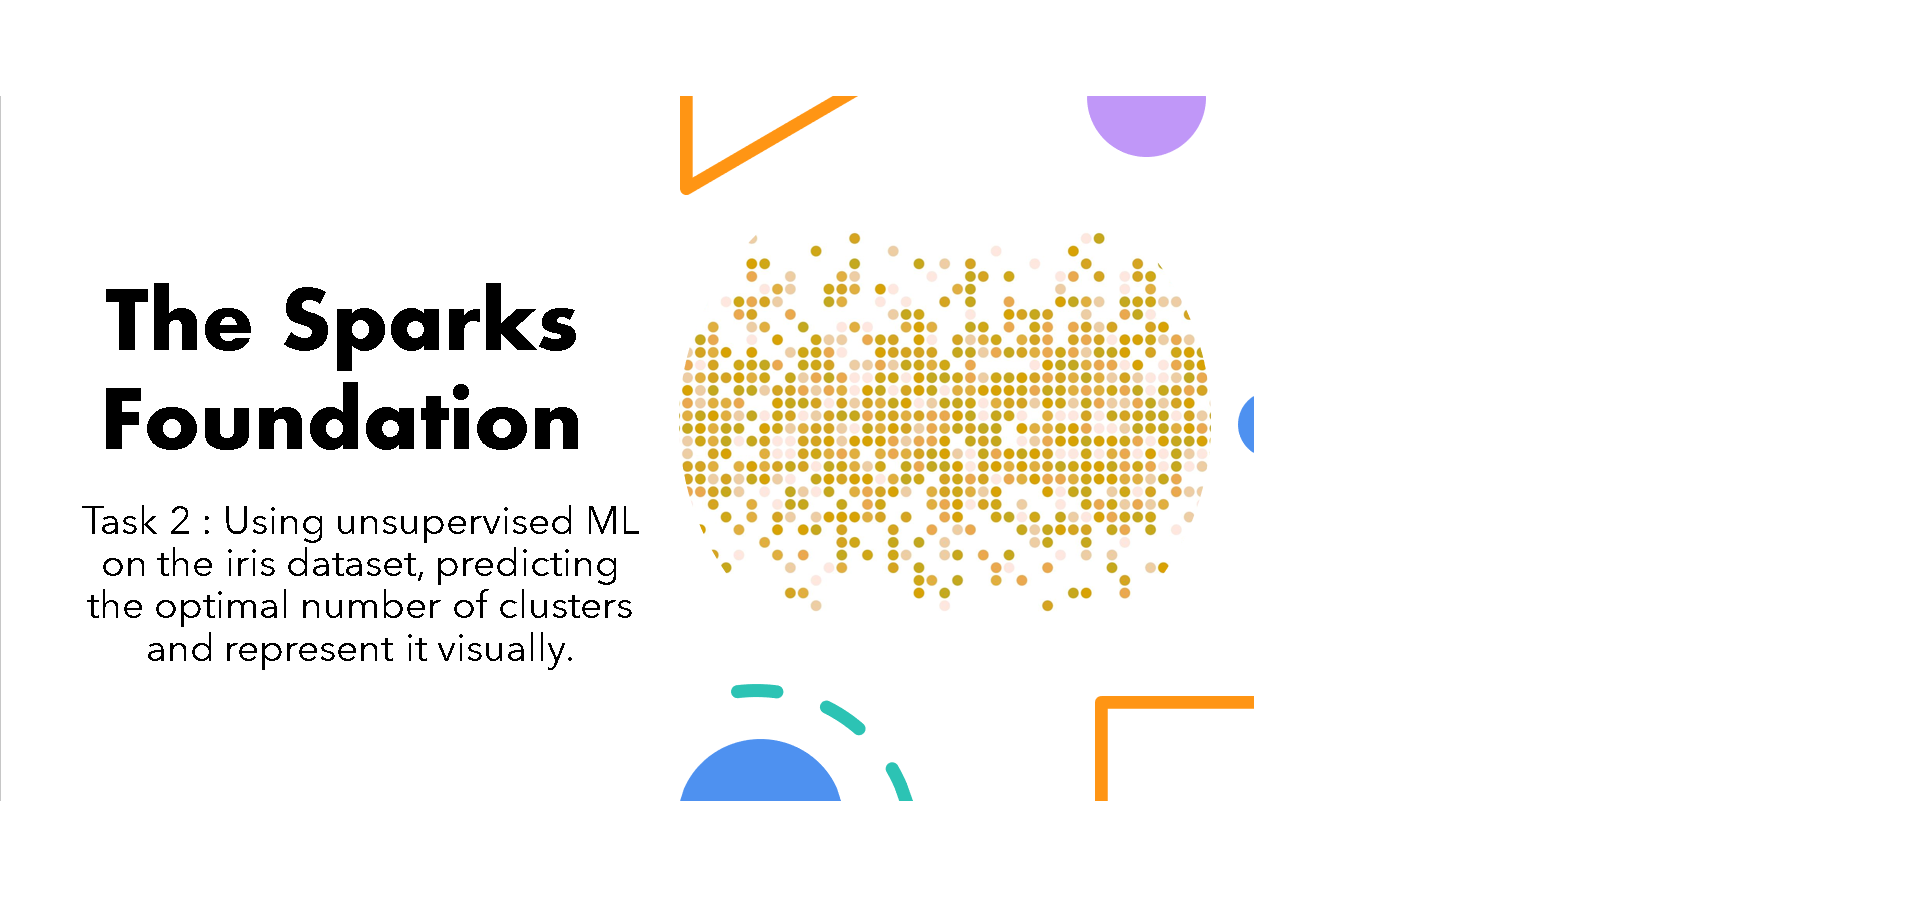

# Name : Kanishk Mehta (kanishkmehta1995@gmail.com)

In [1]:
# Warnings 
import warnings 
warnings.filterwarnings('ignore')

# Data toolkit
import numpy as np
import pandas as pd
import random as rd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')

# SciKit Learn 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scipy 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

# Data Description

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class:
> - Iris Setosa
> - Iris Versicolour
> - Iris Virginica

# Data Understanding

In [2]:
# Loading the data set

iris = pd.read_csv('iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking the informatrics of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### <font color='purple'>Comment :</font>
- From the data informatrics we can see that the data types are correctly defined, the data is good.

In [4]:
# Running decriptive analytics on the datasets
iris.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99,])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
1%,2.490000,4.400000,2.200000,1.149000,0.100000
5%,8.450000,4.600000,2.345000,1.300000,0.200000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
95%,142.550000,7.255000,3.800000,6.100000,2.300000


# EDA

## Missing values check

In [5]:
# Missing values check
missing =pd.DataFrame(100*(iris.isnull().sum()/iris.shape[0]),columns=['Missing%'])

missing

,Missing%
Id,0.0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0
Species,0.0


### <font color='purple'>Comment :</font>
- From the above dataframe we can see that there are no missing values in the data.

## Outliers check

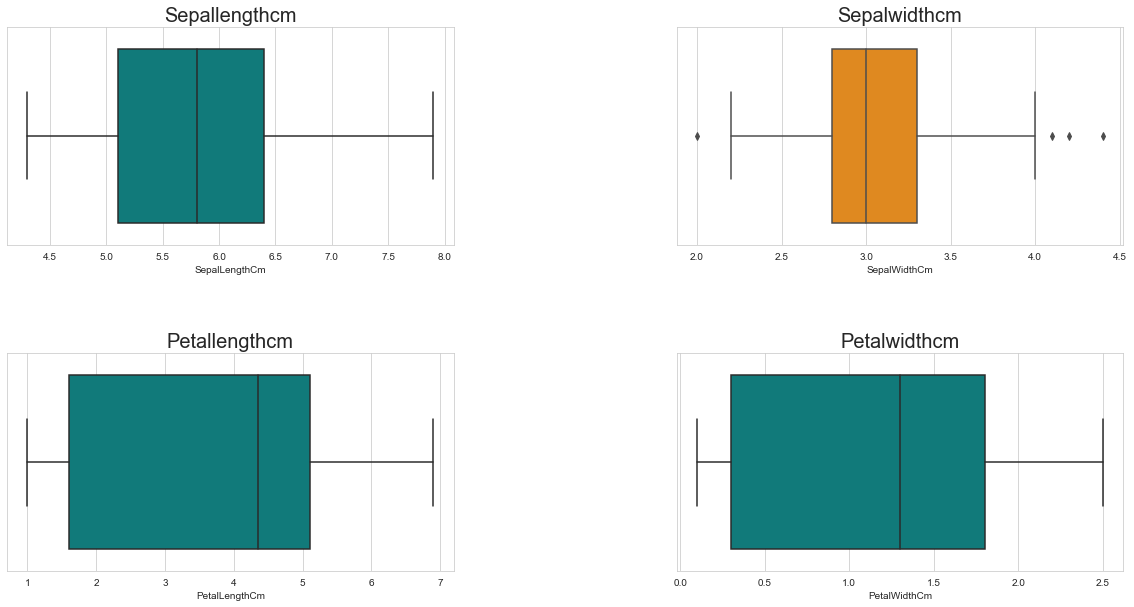

In [6]:
# Plotting the boxplot for outliers check

colors=['darkorange','darkcyan','darkred']

plt.figure(figsize=(20,10))
for i,j in enumerate(iris[iris.columns[1:-1]]):
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=iris,x=j,color=rd.choice(colors))
    plt.title(j.title(),fontsize=20)
plt.show()

### <font color='purple'>Comment :</font>
From the boxplots it is clearly visible that Sepal_width column has outliers. We can handle the outliers by the following ways :
- We can **`remove/drop`** the outliers if we don not loose the relevent information 
- We can retain the outliers by **`capping`** them.

So, we will take the first option of removing/dropping the outliers.

<Figure size 1440x720 with 0 Axes>

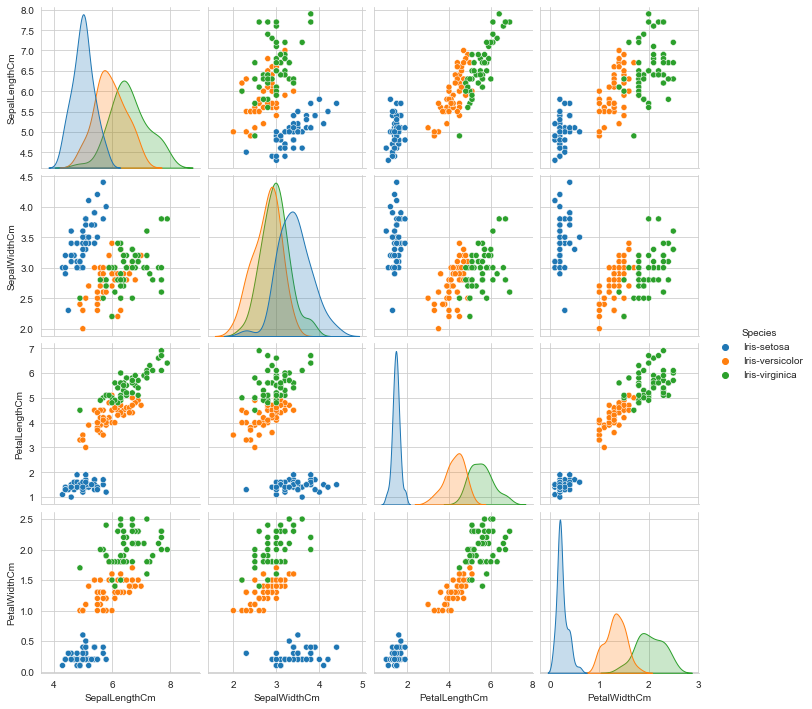

In [7]:
# Plotting the pairplot
plt.figure(figsize=(20,10))
sns.pairplot(iris[iris.columns[1:]],hue='Species')
plt.show()

## Correlations 

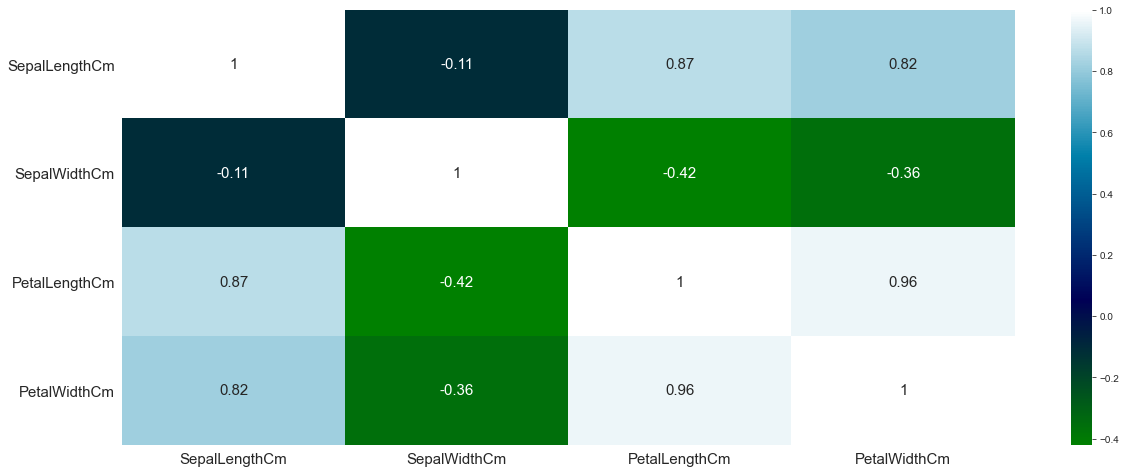

In [8]:
# Correlations
plt.figure(figsize=(20,8))
sns.heatmap(iris[iris.columns[1:]].corr(),annot=True,annot_kws={'fontsize':15},cmap='ocean')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()

### <font color='purple'>Comment :</font>
- From the heatmap above we can see that there is a very strong relationship between **`PetalLengthCm`** and **`PetalWidthCm`** with the correlation value as **0.96**.

# Preparing Data for Modelling

In [9]:
# Hopkin's Test to check the cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    rd.seed(1)
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1* n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [10]:
# Checking the average score of the cluster tendency

li =[]
for i in range(50):
    li.append(round(hopkins(iris[iris.columns[1:-1]]),2))

    
Hopkins_score = round(np.mean(li),2)
print('Average Cluster Tendency (Hopkin\'s test) score : ',Hopkins_score)   

Average Cluster Tendency (Hopkin's test) score :  0.86


### <font color='purple'>Comment :</font>
- On the original data set we can see that we get the **`cluster tendency (Hopkin's Test)`** score as **0.86** which is a pretty good score and thus I can conclude that the data set is good for clustering

In [11]:
iris.shape

(150, 6)

In [12]:
# Outlier Treatment
Q3 = iris['SepalWidthCm'].quantile(0.98)
Q1 = iris['SepalWidthCm'].quantile(0.02)
iris2 = iris[(iris['SepalWidthCm']>=Q1) & (iris['SepalWidthCm']<=Q3)]
iris2.shape

(146, 6)

In [13]:
iris2.index=iris2.pop('Id')

iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


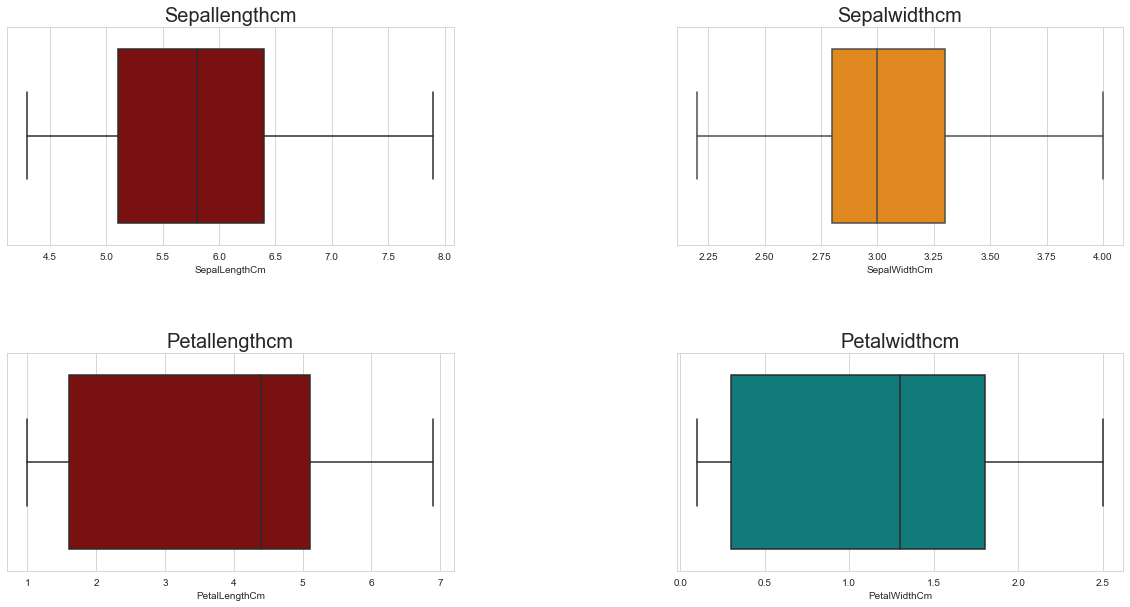

In [14]:
# Plotting the boxplot

plt.figure(figsize=(20,10))
for i,j in enumerate(iris2[iris2.columns[:-1]]):
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=iris2,x=j,color=rd.choice(colors))
    plt.title(j.title(),fontsize=20)
plt.show()

In [15]:
# Let's check the Hopkin's Score
li =[]
for i in range(50):
    li.append(round(hopkins(iris2[iris2.columns[:-1]]),2))

    
Hopkins_score = round(np.mean(li),2)
print('Average Cluster Tendency (Hopkin\'s test) Score : ',Hopkins_score)  

Average Cluster Tendency (Hopkin's test) Score :  0.86


### <font color='purple'>Comment :</font>
- After removing the outliers we see that the **`Average cluster tendency score (Hopkin's test)`** is **0.86**.

In [16]:
# Making the Species column as index
iris2.index = iris2.pop('Species')

iris2.index.name=None

iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


## Rescaling the data

In [17]:
# Rescaling the data using the Standard Scaler technique where mean = 0 and std = 1

scaler=StandardScaler()
iris2_scaled = pd.DataFrame(scaler.fit_transform(iris2),columns=iris2.columns,index=iris2.index)
iris2_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,-0.910515,1.175789,-1.374878,-1.345899
Iris-setosa,-1.151122,-0.093924,-1.374878,-1.345899
Iris-setosa,-1.391729,0.413961,-1.431986,-1.345899
Iris-setosa,-1.512032,0.160019,-1.317771,-1.345899
Iris-setosa,-1.030819,1.429732,-1.374878,-1.345899


In [18]:
li =[]
for i in range(50):
    li.append(round(hopkins(iris2_scaled[iris2_scaled.columns[:-1]]),2))

    
Hopkins_score = round(np.mean(li),2)
print('Average Cluster Tendency (Hopkin\'s test) Score : ',Hopkins_score)  

Average Cluster Tendency (Hopkin's test) Score :  0.88


### <font color='purple'>Comment :</font>
- After scaling we get the **`Average Hopkin's test score`** as **0.88** which is nearer to 1, hence I can say the data is good for clustering.

# Kmeans Clustering

In [19]:
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(iris2_scaled)

KMeans(n_clusters=4, random_state=100)

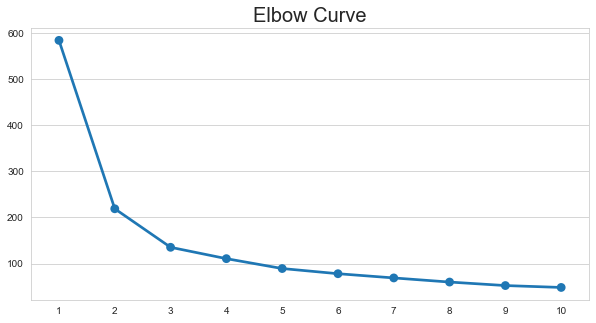

In [20]:
# Plotting the Elbow Curve to visually see the optimal point
ssd=[]
clust_range = [1,2,3,4,5,6,7,8,9,10]
for i in clust_range:
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(iris2_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
ax = sns.pointplot(x=clust_range,y=ssd)
plt.title('Elbow Curve',fontsize=20)
plt.show()

In [21]:
# Choosing the value of K on the basis of Silhoutte Score

for i in clust_range[1:]:
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(iris2_scaled)
    labels = kmeans.labels_
    score = silhouette_score(iris2_scaled,labels)
    print(f'Number of Clusters = {i} with Silhoutte Score = {score}')

Number of Clusters = 2 with Silhoutte Score = 0.5802862813877144
Number of Clusters = 3 with Silhoutte Score = 0.46634515335503746
Number of Clusters = 4 with Silhoutte Score = 0.4147413662578325
Number of Clusters = 5 with Silhoutte Score = 0.36206470830220816
Number of Clusters = 6 with Silhoutte Score = 0.3411784896356965
Number of Clusters = 7 with Silhoutte Score = 0.3592898017819957
Number of Clusters = 8 with Silhoutte Score = 0.368362115278546
Number of Clusters = 9 with Silhoutte Score = 0.3675458183962673
Number of Clusters = 10 with Silhoutte Score = 0.38003105955506555


### <font color='purple'>Comment :</font>

We can see that from silhoutte score, the optimal number of clusters we can choose is 3 (K=3).

In [22]:
# Taking K=3 as the optimal value

kmeans = KMeans(n_clusters=3,random_state=0)
y_means = kmeans.fit_predict(iris2_scaled)

In [23]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [24]:
# Setting the labels
iris2['clusters'] = y_means

iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
Iris-setosa,5.1,3.5,1.4,0.2,0
Iris-setosa,4.9,3.0,1.4,0.2,0
Iris-setosa,4.7,3.2,1.3,0.2,0
Iris-setosa,4.6,3.1,1.5,0.2,0
Iris-setosa,5.0,3.6,1.4,0.2,0


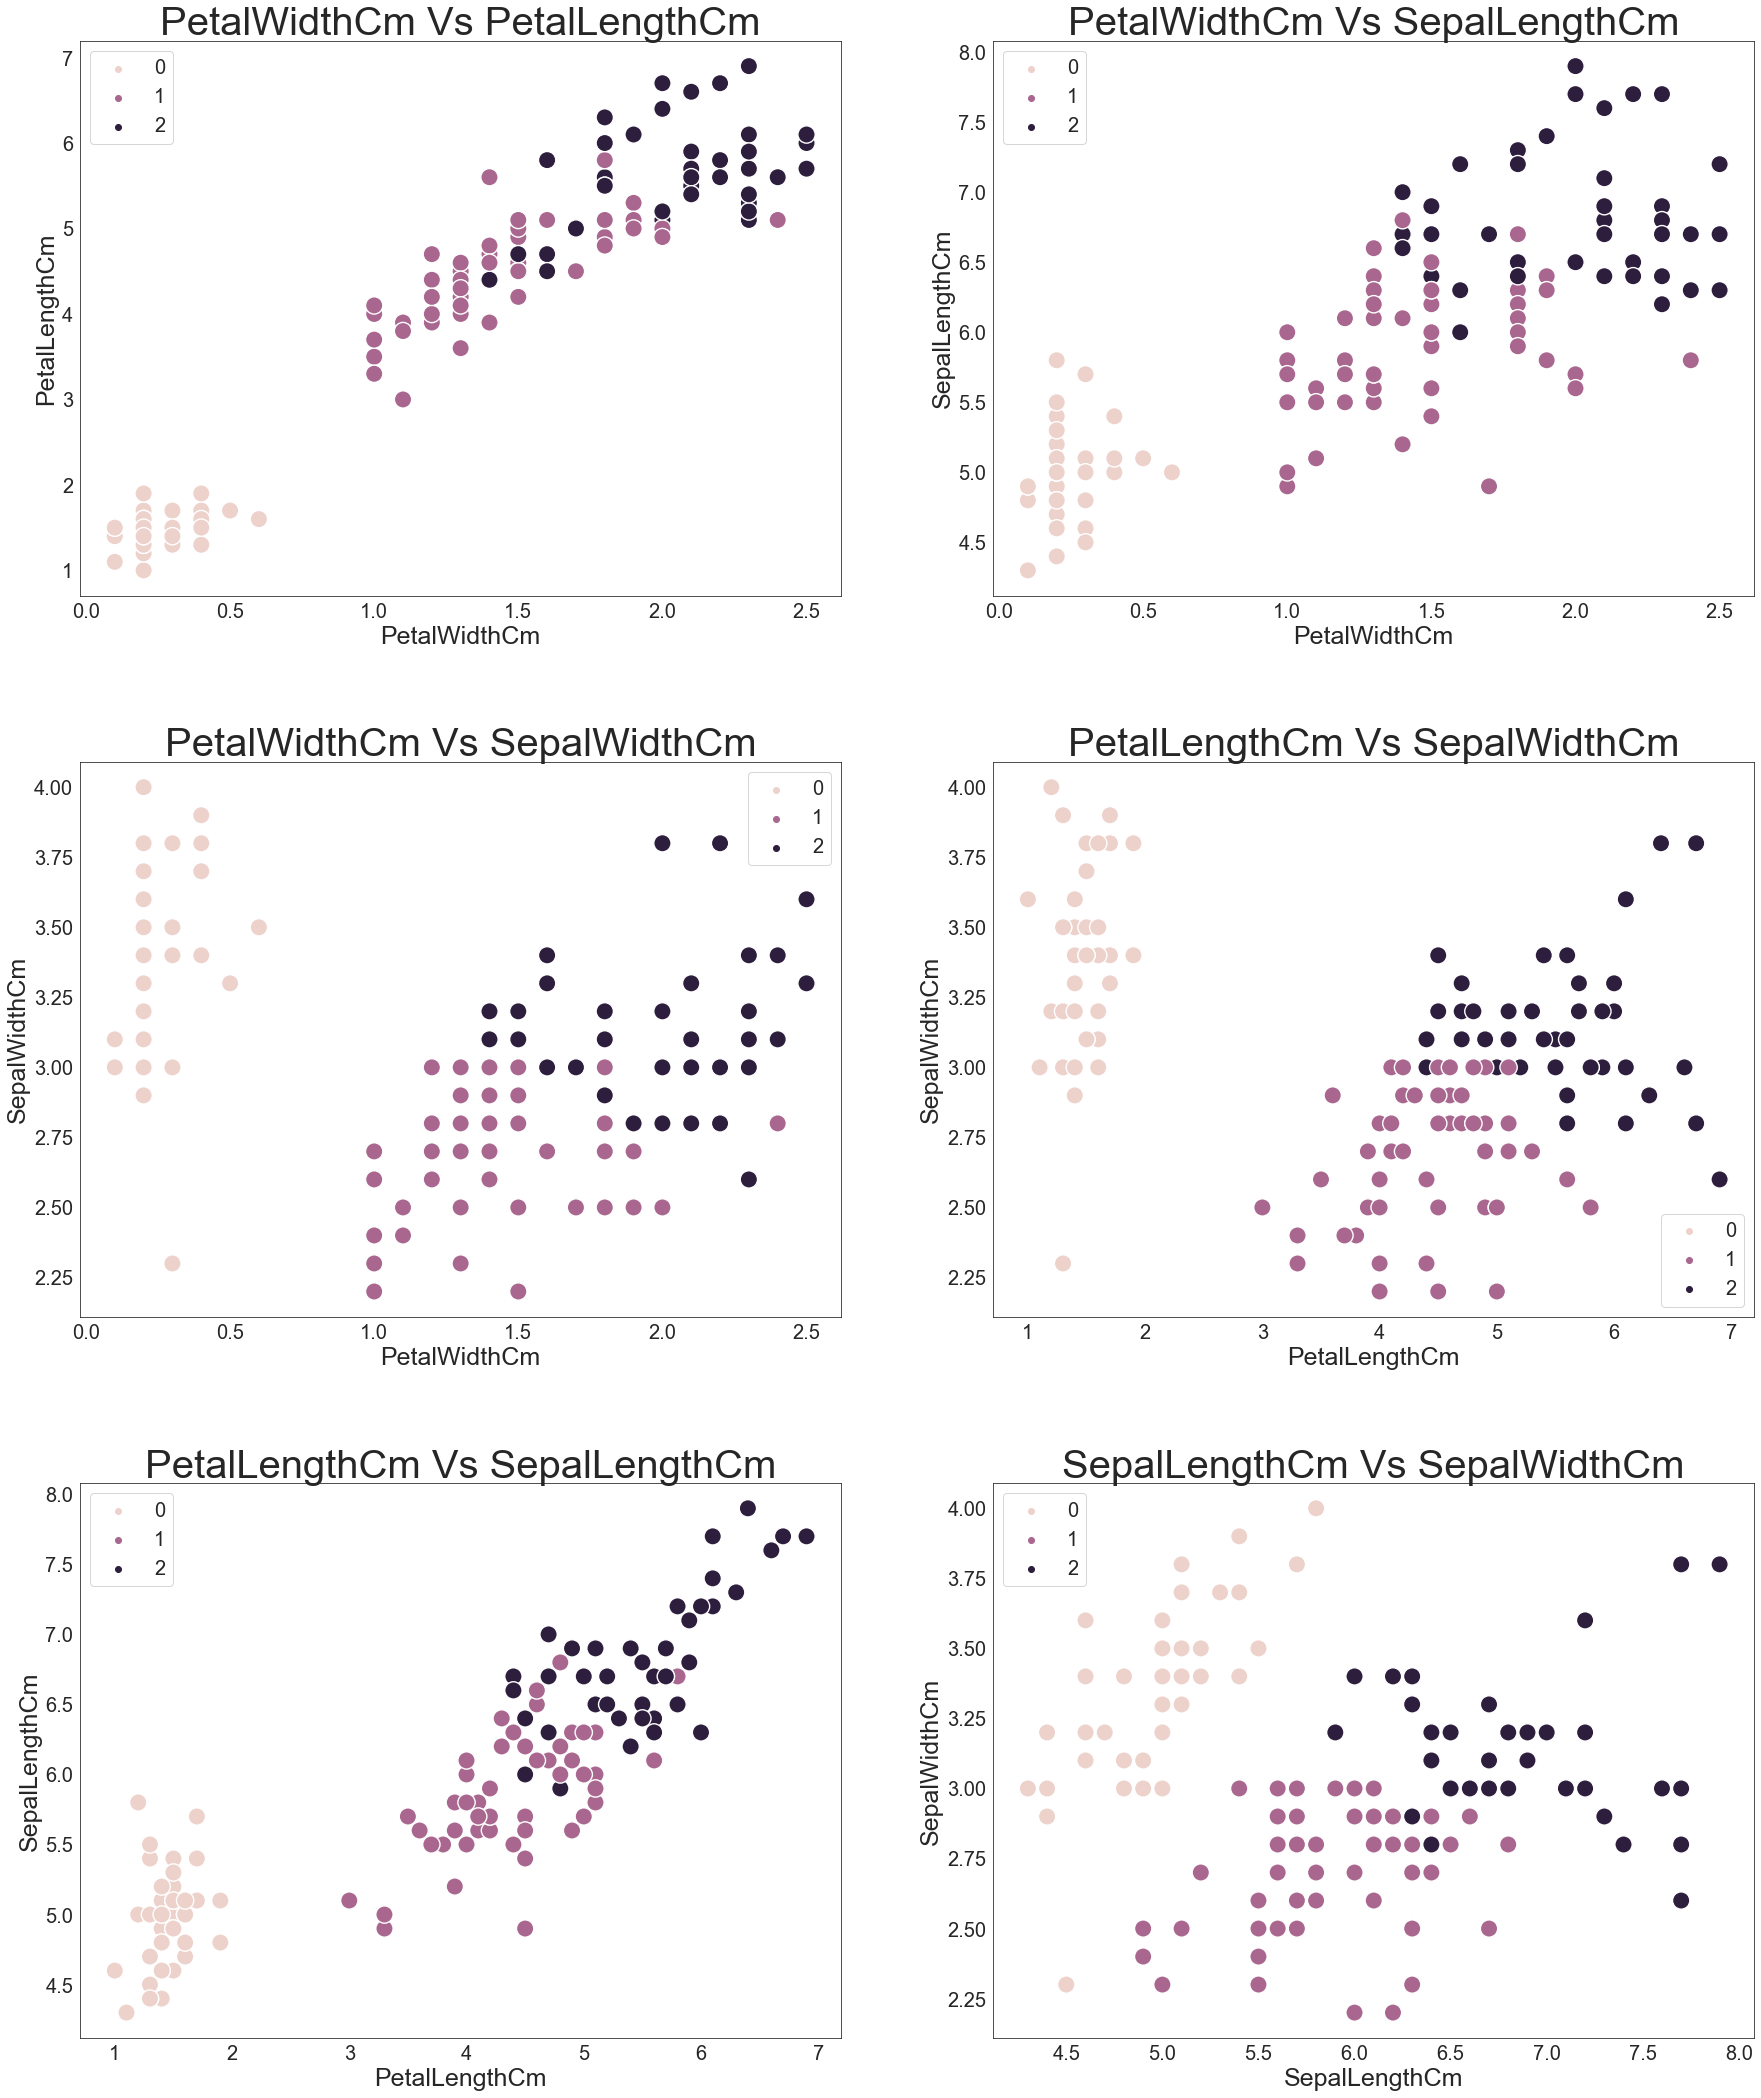

In [25]:
# Visualising the distribution of clusters in the features
sns.set_style('white')

plt.figure(figsize=(30,50))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.subplot(4,2,1)
sns.scatterplot(data=iris2,hue='clusters',x='PetalWidthCm',y='PetalLengthCm',s=300)
plt.title('PetalWidthCm Vs PetalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('PetalLengthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(4,2,2)
sns.scatterplot(data=iris2,hue='clusters',x='PetalWidthCm',y='SepalLengthCm',s=300)
plt.title('PetalWidthCm Vs SepalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('SepalLengthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,2,3)
sns.scatterplot(data=iris2,hue='clusters',x='PetalWidthCm',y='SepalWidthCm',s=300)
plt.title('PetalWidthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='best',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,2,4)
sns.scatterplot(data=iris2,hue='clusters',x='PetalLengthCm',y='SepalWidthCm',s=300)
plt.title('PetalLengthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='best',fontsize=20)
plt.xlabel('PetalLengthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,2,5)
sns.scatterplot(data=iris2,hue='clusters',x='PetalLengthCm',y='SepalLengthCm',s=300)
plt.title('PetalLengthCm Vs SepalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalLengthCm',fontsize=25)
plt.ylabel('SepalLengthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,2,6)
sns.scatterplot(data=iris2,hue='clusters',x='SepalLengthCm',y='SepalWidthCm',s=300)
plt.title('SepalLengthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('SepalLengthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

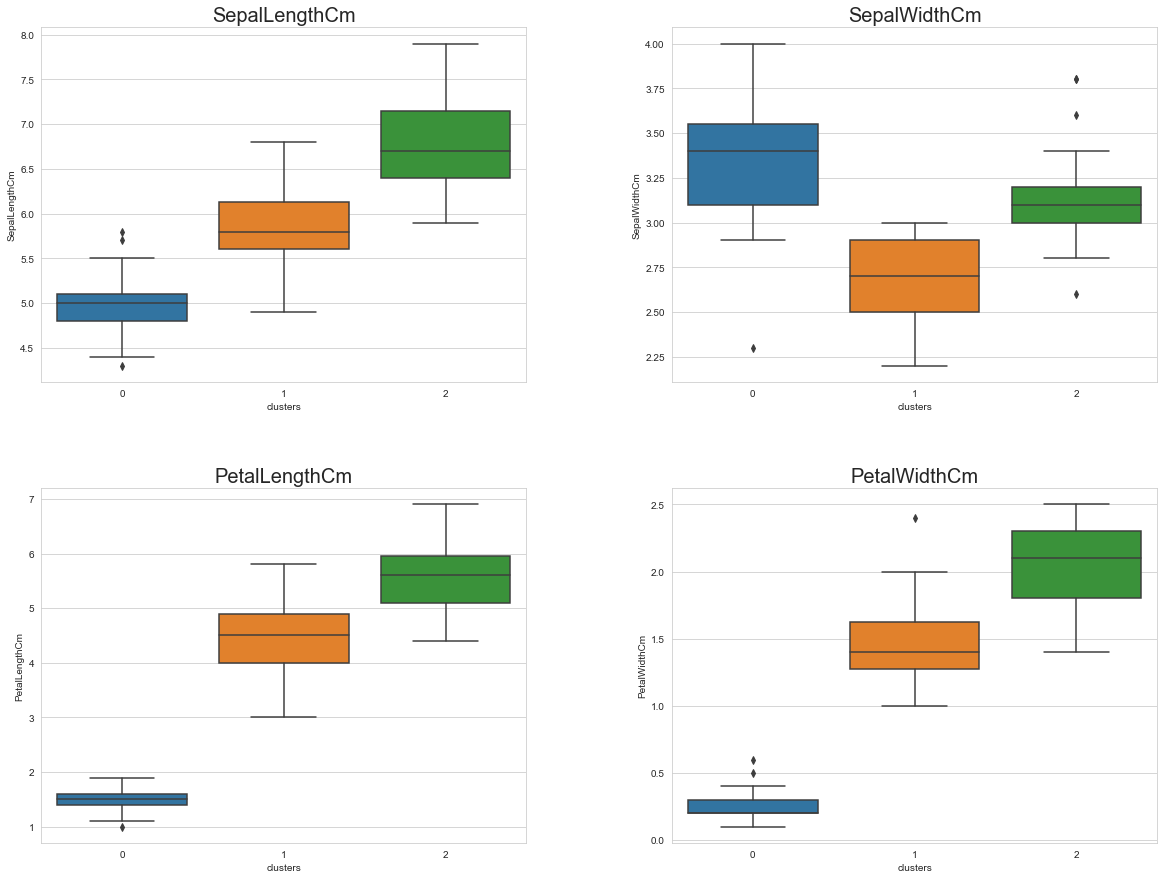

In [26]:
# Plotting the boxplot for visualising clusters column wise
sns.set_style('whitegrid')
cols = iris2.columns[:-1]

plt.figure(figsize=(20,15))
for i,j in enumerate(cols):
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=iris2,x='clusters',y=j)
    plt.title(j,fontsize=20)
plt.show()

In [27]:
# Cluster Profiling
profiling = iris2.groupby('clusters').mean()
profiling

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clusters,,,,
0,4.976596,3.365957,1.463830,0.244681
1,5.866071,2.691071,4.444643,1.442857
2,6.806977,3.127907,5.539535,1.995349


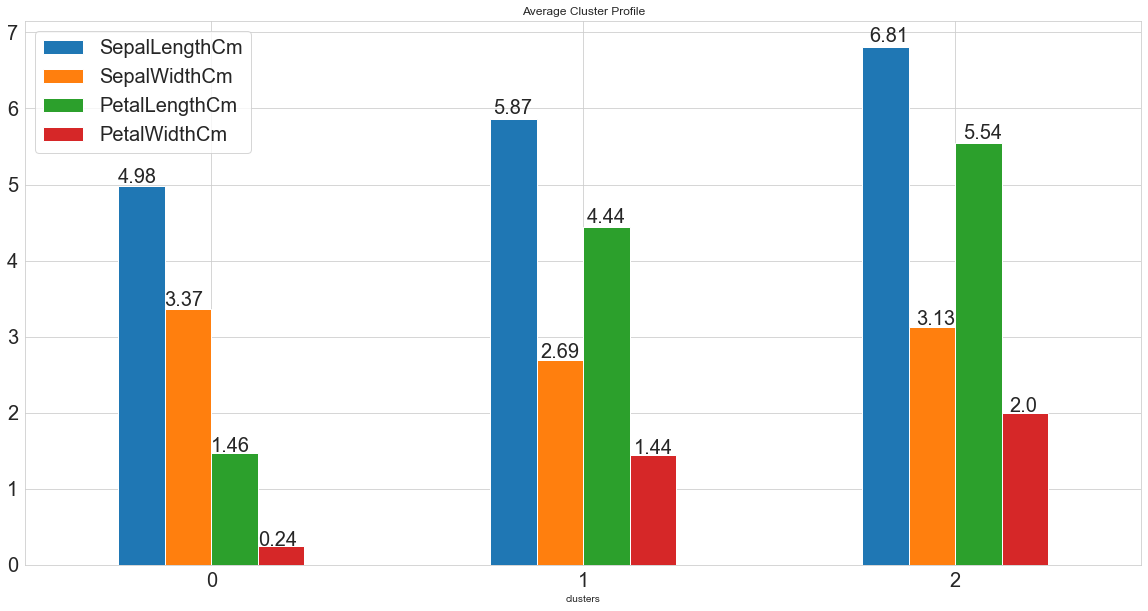

In [28]:
# Plotting the average values of the clusters
ax = profiling.plot(kind='bar',figsize=(20,10))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=20)
plt.title('Average Cluster Profile')
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [29]:
# Cluster 0
iris2[iris2['clusters']==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
Iris-setosa,5.1,3.5,1.4,0.2,0
Iris-setosa,4.9,3.0,1.4,0.2,0
Iris-setosa,4.7,3.2,1.3,0.2,0
Iris-setosa,4.6,3.1,1.5,0.2,0
Iris-setosa,5.0,3.6,1.4,0.2,0


In [30]:
# CLuster 1
iris2[iris2['clusters']==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
Iris-versicolor,5.5,2.3,4.0,1.3,1
Iris-versicolor,6.5,2.8,4.6,1.5,1
Iris-versicolor,5.7,2.8,4.5,1.3,1
Iris-versicolor,4.9,2.4,3.3,1.0,1
Iris-versicolor,6.6,2.9,4.6,1.3,1


In [31]:
# Cluster 2
iris2[iris2['clusters']==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
Iris-versicolor,7.0,3.2,4.7,1.4,2
Iris-versicolor,6.4,3.2,4.5,1.5,2
Iris-versicolor,6.9,3.1,4.9,1.5,2
Iris-versicolor,6.3,3.3,4.7,1.6,2
Iris-versicolor,6.7,3.1,4.4,1.4,2


# Hierarchical Clustering

In [32]:
iris2_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,-0.910515,1.175789,-1.374878,-1.345899
Iris-setosa,-1.151122,-0.093924,-1.374878,-1.345899
Iris-setosa,-1.391729,0.413961,-1.431986,-1.345899
Iris-setosa,-1.512032,0.160019,-1.317771,-1.345899
Iris-setosa,-1.030819,1.429732,-1.374878,-1.345899


In [33]:
# Preparing the data for 
iris2_hr = iris2.drop(columns='clusters')

iris2_hr_scaled = iris2_scaled.copy()

In [34]:
iris2_hr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


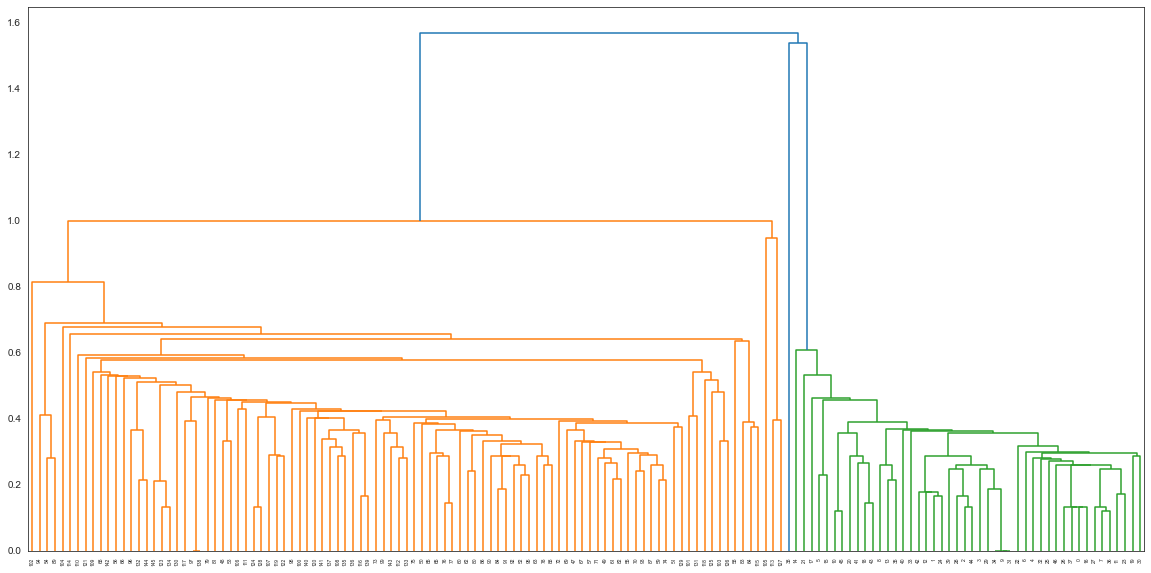

In [35]:
# Linkage method as single
mergings = linkage(iris2_hr_scaled,method='single')

sns.set_style('white')

plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

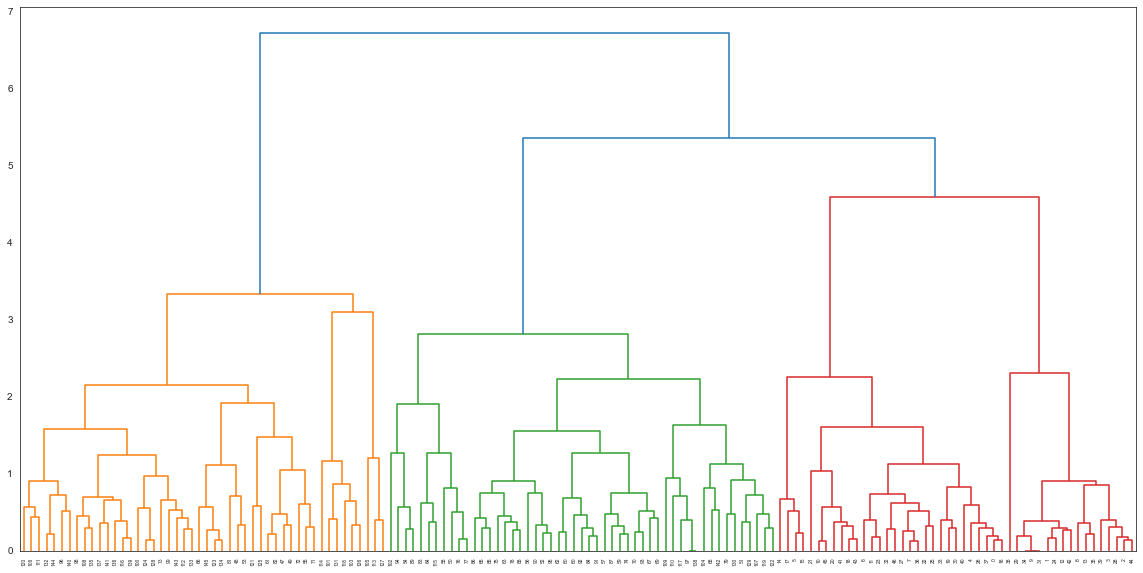

In [36]:
# Linkage method as complete
mergings = linkage(iris2_hr_scaled,method='complete')
plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

In [37]:
# Defining the labels 
labels = cut_tree(mergings,n_clusters=3).reshape(-1,1)
iris2_hr['clusters'] = labels
iris2_hr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
Iris-setosa,5.1,3.5,1.4,0.2,0
Iris-setosa,4.9,3.0,1.4,0.2,0
Iris-setosa,4.7,3.2,1.3,0.2,0
Iris-setosa,4.6,3.1,1.5,0.2,0
Iris-setosa,5.0,3.6,1.4,0.2,0


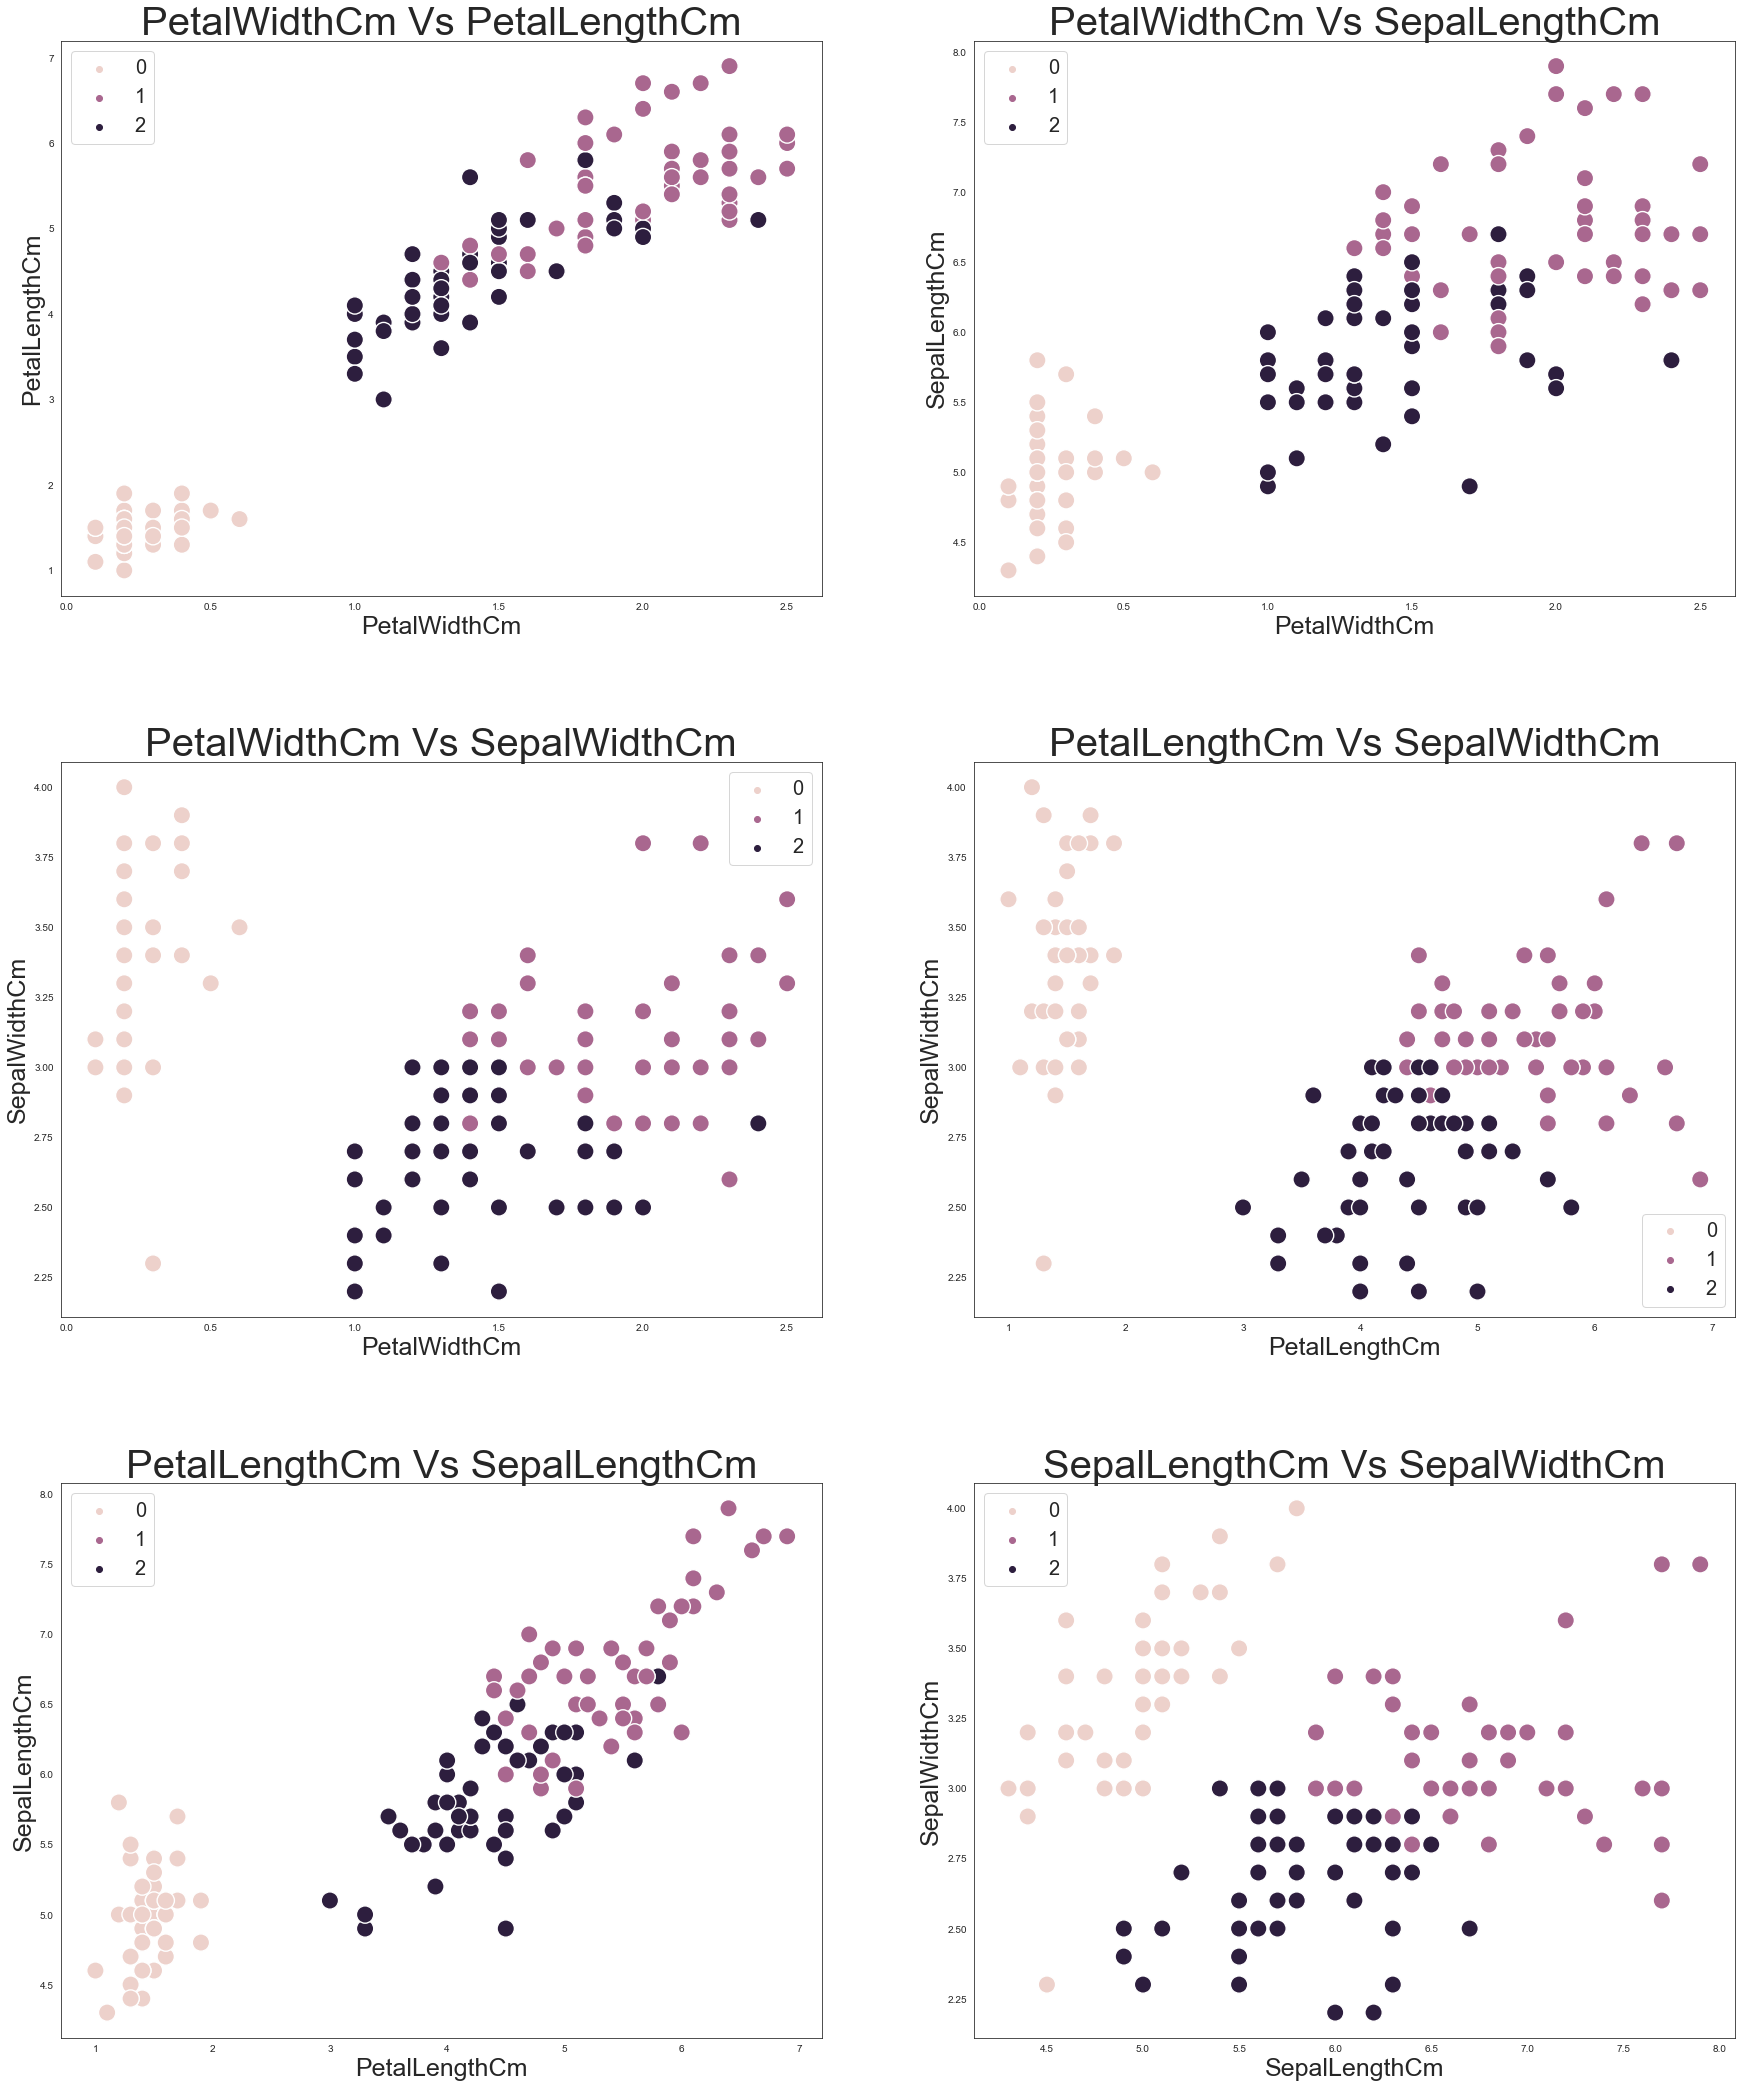

In [38]:
# Visualising the distribution of clusters in the features
sns.set_style('white')

plt.figure(figsize=(30,50))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.subplot(4,2,1)
sns.scatterplot(data=iris2_hr,hue='clusters',x='PetalWidthCm',y='PetalLengthCm',s=300)
plt.title('PetalWidthCm Vs PetalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('PetalLengthCm',fontsize=25)

plt.subplot(4,2,2)
sns.scatterplot(data=iris2_hr,hue='clusters',x='PetalWidthCm',y='SepalLengthCm',s=300)
plt.title('PetalWidthCm Vs SepalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('SepalLengthCm',fontsize=25)

plt.subplot(4,2,3)
sns.scatterplot(data=iris2_hr,hue='clusters',x='PetalWidthCm',y='SepalWidthCm',s=300)
plt.title('PetalWidthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='best',fontsize=20)
plt.xlabel('PetalWidthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)

plt.subplot(4,2,4)
sns.scatterplot(data=iris2_hr,hue='clusters',x='PetalLengthCm',y='SepalWidthCm',s=300)
plt.title('PetalLengthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='best',fontsize=20)
plt.xlabel('PetalLengthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)

plt.subplot(4,2,5)
sns.scatterplot(data=iris2_hr,hue='clusters',x='PetalLengthCm',y='SepalLengthCm',s=300)
plt.title('PetalLengthCm Vs SepalLengthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('PetalLengthCm',fontsize=25)
plt.ylabel('SepalLengthCm',fontsize=25)

plt.subplot(4,2,6)
sns.scatterplot(data=iris2_hr,hue='clusters',x='SepalLengthCm',y='SepalWidthCm',s=300)
plt.title('SepalLengthCm Vs SepalWidthCm',fontsize=40)
plt.legend(loc='upper left',fontsize=20)
plt.xlabel('SepalLengthCm',fontsize=25)
plt.ylabel('SepalWidthCm',fontsize=25)

plt.show()

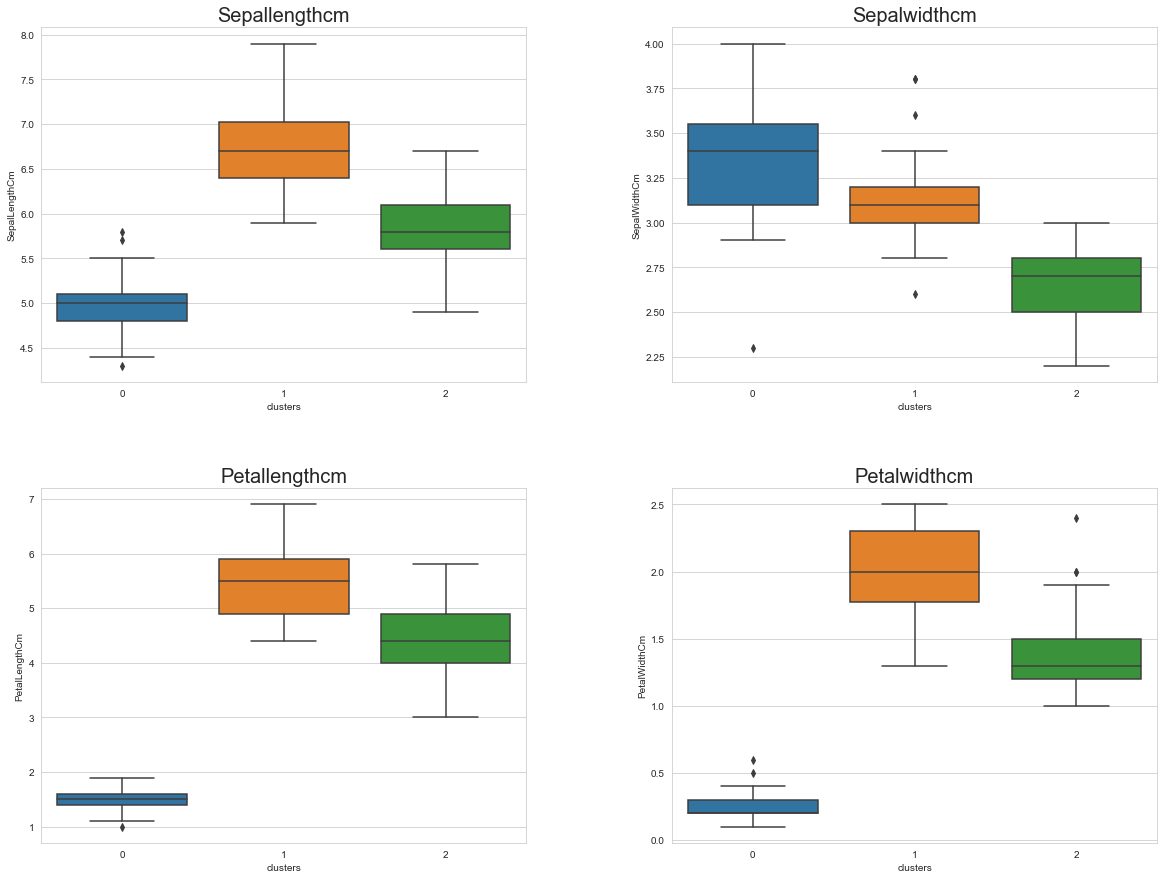

In [39]:
# Plotting the boxplot for visualising the clusters column wise

sns.set_style('whitegrid')
cols = iris2.columns[:-1]

plt.figure(figsize=(20,15))
for i,j in enumerate(cols):
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=iris2_hr,x='clusters',y=j)
    plt.title(j.title(),fontsize=20)
plt.show()

In [40]:
# Cluster Profiling
profiling = iris2_hr.groupby('clusters').mean()
profiling

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clusters,,,,
0,4.976596,3.365957,1.463830,0.244681
1,6.752083,3.108333,5.466667,1.956250
2,5.825490,2.666667,4.405882,1.425490


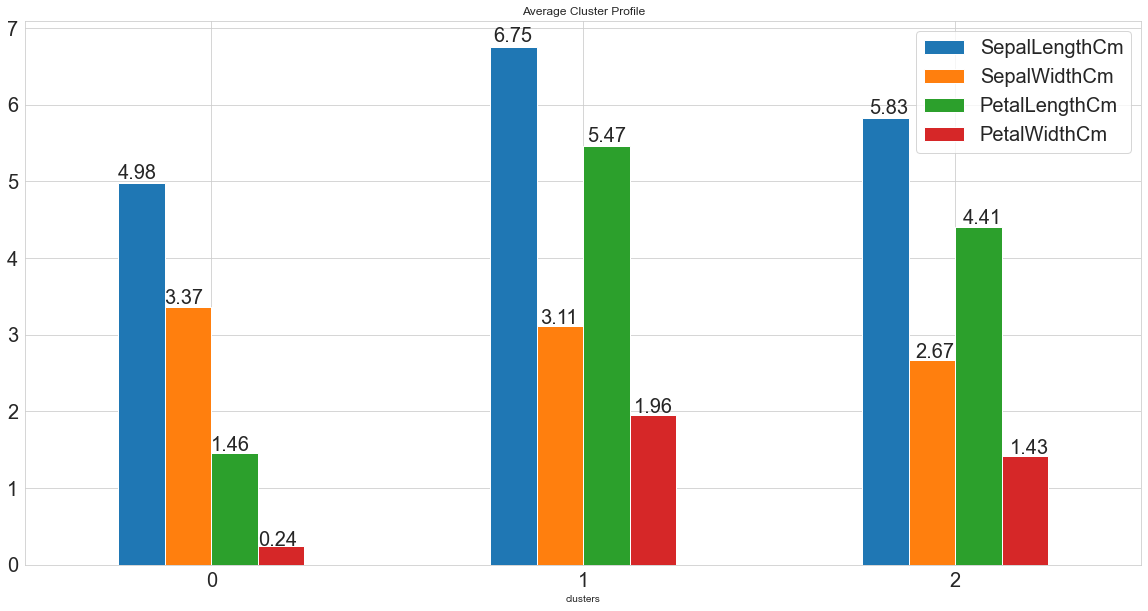

In [41]:
# Plotting the average values of the clusters
ax = profiling.plot(kind='bar',figsize=(20,10))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=20)
plt.title('Average Cluster Profile')
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()